In [1]:

import elastix 
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import os
import SimpleITK as sitk

## Fill in your own paths in the cell below ##

In [3]:
ELASTIX_PATH = 'C:/Users/20183303/Documents/Jaar 5 - ME/Q3/CS in medische beeldanalyse/Elastix files/Elastix.exe'
el = elastix.ElastixInterface(elastix_path=ELASTIX_PATH)
TRANSFORMIX_PATH = 'C:/Users/20183303/Documents/Jaar 5 - ME/Q3/CS in medische beeldanalyse/Elastix files/Transformix.exe'
filepath_data = r'C:\Users\20183303\Documents\Jaar 5 - ME\Q3\CS in medische beeldanalyse\Image Registration Assignment\TrainingData'


In [20]:
file_p102 = filepath_data+'\p102'+'\mr_bffe.mhd'  # example of patient 102 input image

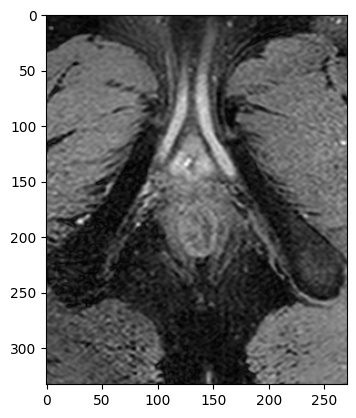

In [24]:
readable_img = imageio.imread(file_p102)
plt.imshow(readable_img[2,:,:], cmap='gray') # Use first index to select transverse slice